In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
confirm = pd.read_csv('./data/confirmed.csv')
confirm

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,20200120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20200121,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20200122,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20200123,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20200124,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,20211116,133513,14875,17964,21654,5660,7920,5528,1409,119695,7696,8411,11655,5748,3889,10378,13905,3327
653,20211117,134948,14978,18020,21813,5694,7965,5542,1425,120658,7750,8439,11726,5798,3925,10404,13971,3350
654,20211118,136376,15068,18093,22008,5728,8001,5552,1435,121624,7812,8465,11808,5852,3965,10455,14069,3378
655,20211119,137777,15145,18140,22196,5752,8054,5556,1438,122473,7884,8485,11864,5876,4011,10504,14147,3409


In [3]:
death = pd.read_csv('./data/death.csv')
death

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,20200120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20200121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20200122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20200123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20200124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,20211116,890,172,290,120,29,56,57,2,1036,68,88,68,69,25,98,46,7
653,20211117,898,174,291,121,29,56,57,2,1043,68,88,68,70,25,98,46,8
654,20211118,912,175,293,123,29,56,57,2,1047,68,88,72,70,25,99,46,9
655,20211119,926,175,295,125,29,56,57,2,1054,68,88,73,70,25,100,47,9


In [4]:
import folium


In [5]:
map = folium.Map(location=[37, 127], zoom_start=7)


In [6]:
total2 = death.iloc[-1].to_frame(name='사망자')
total2.drop(index='날짜', inplace=True)
total2

,사망자
서울,941
부산,177
대구,296
인천,126
광주,29
대전,56
울산,57
세종,2
경기,1061
강원,69


In [7]:
total = confirm.iloc[-1].to_frame(name='확진자')
total.drop(index='날짜', inplace=True)
total


,확진자
서울,139154
부산,15231
대구,18201
인천,22400
광주,5791
대전,8086
울산,5561
세종,1445
경기,123466
강원,7943


In [8]:
total['사망자'] = total2['사망자']

In [9]:
total.loc['서울', '경도'] = 126.97806
total.loc['부산', '경도'] = 129.07556
total.loc['대구', '경도'] = 128.60250
total.loc['인천', '경도'] = 126.70528
total.loc['광주', '경도'] = 126.85306
total.loc['대전', '경도'] = 127.38500
total.loc['울산', '경도'] = 129.31667
total.loc['경기', '경도'] = 127.179108
total.loc['강원', '경도'] = 128.873749
total.loc['충북', '경도'] = 127.926178
total.loc['충남', '경도'] = 127.082977
total.loc['전북', '경도'] = 126.951141
total.loc['전남', '경도'] = 127.698212
total.loc['경북', '경도'] = 129.173126
total.loc['경남', '경도'] = 128.747406
total.loc['제주', '경도'] = 126.5400
total.loc['세종', '경도'] = 127.28167


In [10]:
total

,확진자,사망자,경도
서울,139154,941,126.978060
부산,15231,177,129.075560
대구,18201,296,128.602500
인천,22400,126,126.705280
광주,5791,29,126.853060
대전,8086,56,127.385000
울산,5561,57,129.316670
세종,1445,2,127.281670
경기,123466,1061,127.179108
강원,7943,69,128.873749


In [11]:
total.loc['서울', '위도'] = 37.56667
total.loc['부산', '위도'] = 35.17944
total.loc['대구', '위도'] = 35.87222
total.loc['인천', '위도'] = 37.45639
total.loc['광주', '위도'] = 35.15972
total.loc['대전', '위도'] = 36.35111
total.loc['울산', '위도'] = 35.53889
total.loc['경기', '위도'] = 37.26389
total.loc['강원', '위도'] = 37.757687
total.loc['충북', '위도'] = 36.995972
total.loc['충남', '위도'] = 36.476515
total.loc['전북', '위도'] = 35.95133
total.loc['전남', '위도'] = 34.946739
total.loc['경북', '위도'] = 35.837855
total.loc['경남', '위도'] = 35.498692
total.loc['제주', '위도'] = 33.3728
total.loc['세종', '위도'] = 36.48750


In [12]:
total.loc['서울', ['확진자', '사망자']]

확진자    139154.0
사망자       941.0
Name: 서울, dtype: float64

In [13]:
total

,확진자,사망자,경도,위도
서울,139154,941,126.978060,37.566670
부산,15231,177,129.075560,35.179440
대구,18201,296,128.602500,35.872220
인천,22400,126,126.705280,37.456390
광주,5791,29,126.853060,35.159720
대전,8086,56,127.385000,36.351110
울산,5561,57,129.316670,35.538890
세종,1445,2,127.281670,36.487500
경기,123466,1061,127.179108,37.263890
강원,7943,69,128.873749,37.757687


In [14]:
total.columns

Index(['확진자', '사망자', '경도', '위도'], dtype='object')

In [15]:
# html=df.to_html(classes = 'table table-striped table-hover table-condensed table-responsive')


In [16]:
for i in range(len(total)):
    folium.Marker([total.iloc[i][3], total.iloc[i][2]], icon=folium.Icon(color='blue'),
                  
                  
                  
                  


                  tooltip=f'{total.iloc[i].name}  사망자 : {int(total.iloc[i][1])}   확진자: {int(total.iloc[i][0])}').add_to(map)


In [17]:
map

In [18]:
N = total.shape[0]

In [19]:
index = np.arange(N)

<BarContainer object of 17 artists>

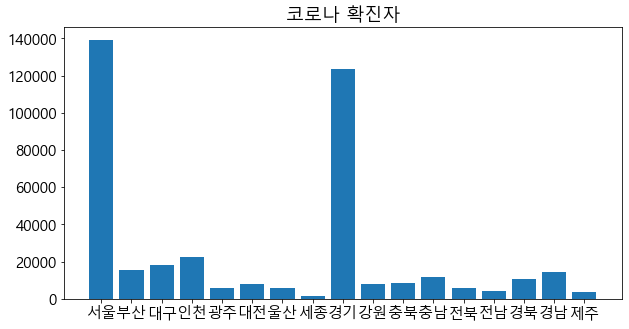

In [20]:
plt.figure(figsize=(10, 5))
plt.title('코로나 확진자')

plt.bar(total.index, total['확진자'])
# plt.bar(total.index, total['사망자'], bottom=total['확진자'])






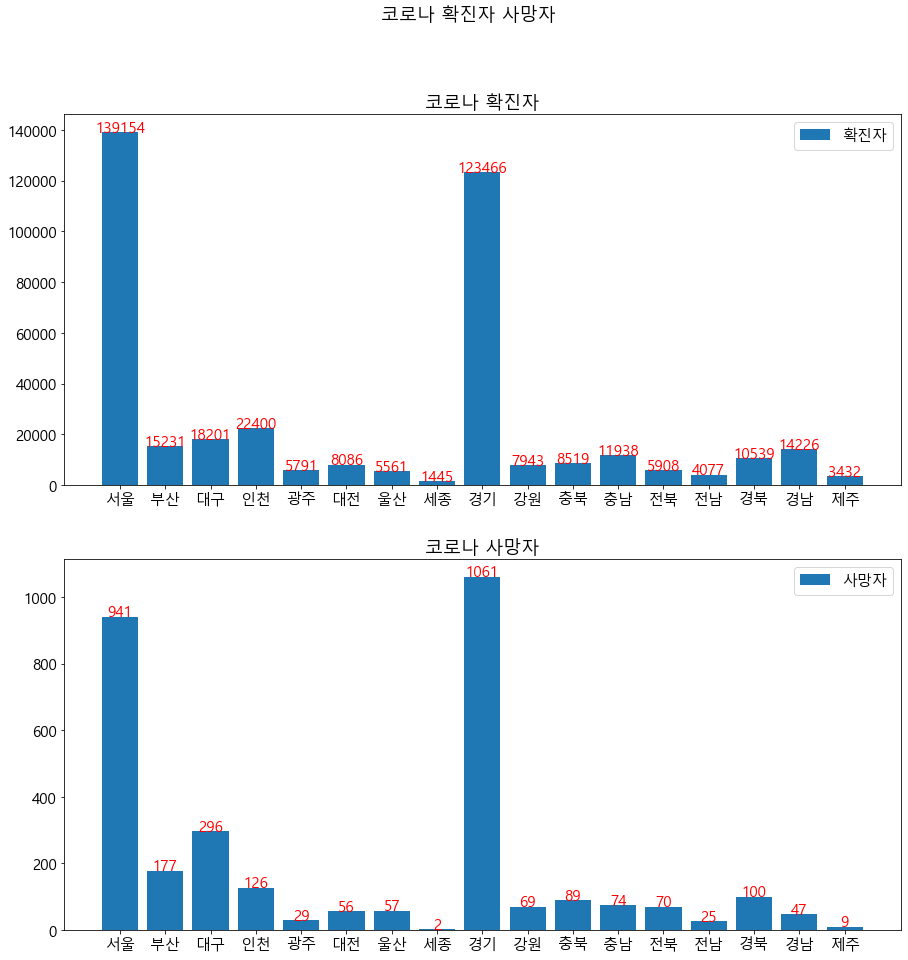

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
fig.suptitle('코로나 확진자 사망자')

axs[0].set_title('코로나 확진자')
axs[1].set_title('코로나 사망자')

labels = total.index
values = total['확진자']
bar = axs[0].bar(labels, values, label='확진자')


for idx, rect in enumerate(bar):
    axs[0].text(idx, rect.get_height()+0.9, values[idx], ha='center', color='red')
axs[0].legend()


labels = total.index
values = total['사망자']
bar = axs[1].bar(labels, values, label='사망자')


for idx, rect in enumerate(bar):
    axs[1].text(idx, rect.get_height()+0.9, values[idx], ha='center', color='red')
axs[1].legend()


In [22]:
confirm['서울']

0           0
1           0
2           0
3           0
4           1
        ...  
652    133513
653    134948
654    136376
655    137777
656    139154
Name: 서울, Length: 657, dtype: int64

In [23]:
confirm['날짜']

0      20200120
1      20200121
2      20200122
3      20200123
4      20200124
         ...   
652    20211116
653    20211117
654    20211118
655    20211119
656    20211120
Name: 날짜, Length: 657, dtype: int64

In [24]:
date = pd.to_datetime(confirm['날짜'], format='%Y%m%d')

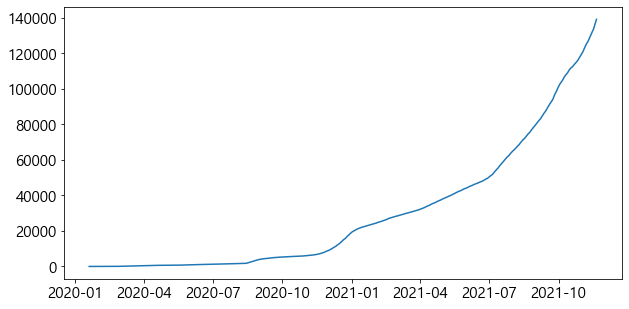

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(date, confirm['서울'])

In [26]:
confirm['서울']

0           0
1           0
2           0
3           0
4           1
        ...  
652    133513
653    134948
654    136376
655    137777
656    139154
Name: 서울, Length: 657, dtype: int64

In [27]:
y = confirm['서울'].diff()
z = death['서울'].diff()

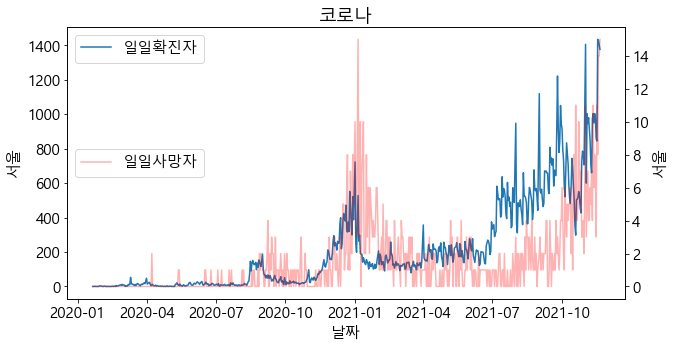

In [28]:
plt.figure(figsize=(10, 5))
plt.title('코로나')

sns.lineplot(data=confirm,  x=date, y=y, label='일일확진자')
ax1 = plt.gca()
ax2 = ax1.twinx()
sns.lineplot(data=death, x=date, y=z, ax=ax2,label='일일사망자', color='red', alpha=0.3)
plt.legend(loc='center left')
